In [1]:
import pandas as pd 
dataset=pd.read_csv("indianEco.csv")
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset.set_index('Year', inplace=True)
dataset

,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,,,,
1960-01-01,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1961-01-01,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
1962-01-01,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
1963-01-01,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
1964-01-01,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,India,2.294798e+12,1733,8.26,20.92,19.16,3.616943e+11,4.95,1338636340,1.19,68.67
2017-01-01,India,2.651473e+12,1981,6.80,21.95,18.79,4.126138e+11,3.33,1354195680,1.16,68.97
2018-01-01,India,2.702930e+12,1997,6.53,23.69,19.93,3.991672e+11,3.94,1369003306,1.09,69.27


In [2]:
column = "Inflation, consumer prices (annual %)"
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (61, 1)


In [3]:
training_size = round(len(data1) * 0.80)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

49
X_train length: (49, 1)
X_test length: (12, 1)
y_train length: (49, 1)
y_test length: (12, 1)


# AR model 

In [5]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from stockFunctions import rmsemape  # Importing rmsemape function from stockFunctions module


In [6]:
i=3
td='n'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=3,Trend=n
RMSE-Testset: 0.07638630580651028
maPe-Testset: 0.13560575755692686
************


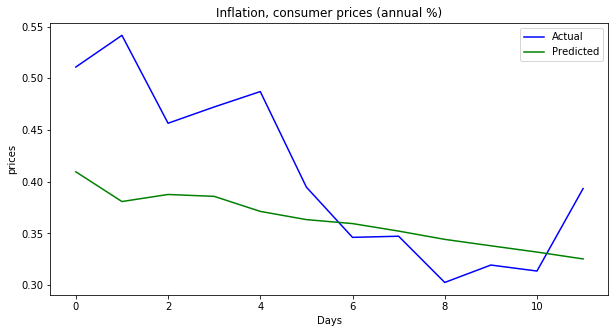

In [7]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [8]:
y_test

array([[0.51090257],
       [0.54154016],
       [0.45652774],
       [0.47226056],
       [0.48716533],
       [0.39470052],
       [0.346122  ],
       [0.34722606],
       [0.30251173],
       [0.31934861],
       [0.3135523 ],
       [0.39332045]])

In [11]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


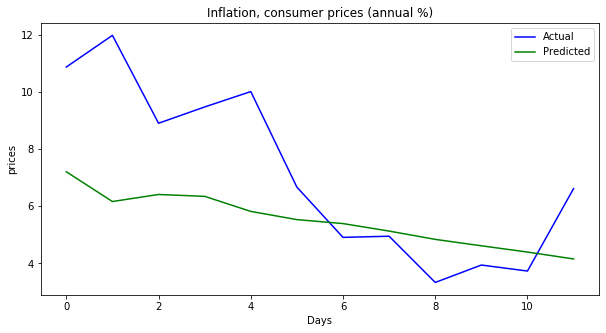

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [14]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)
forecast=model_fit.predict(len(data1), len(data1)+3)
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_oriF

RMSE-Testset: 2.7674758593698674
maPe-Testset: 0.27781624441344416


,"Inflation, consumer prices (annual %)"
0,3.922769
1,3.705491
2,3.488179
3,3.272073


# MA  model

In [22]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
td="ct"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trend=ct
RMSE-Testset: 0.10344230509106414
maPe-Testset: 0.22876529459349382
************


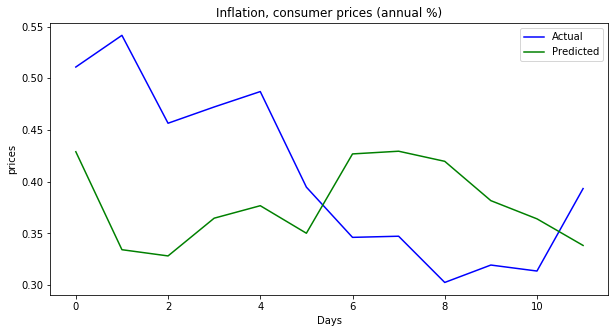

In [23]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [24]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


In [25]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[10.88],
       [11.99],
       [ 8.91],
       [ 9.48],
       [10.02],
       [ 6.67],
       [ 4.91],
       [ 4.95],
       [ 3.33],
       [ 3.94],
       [ 3.73],
       [ 6.62]])

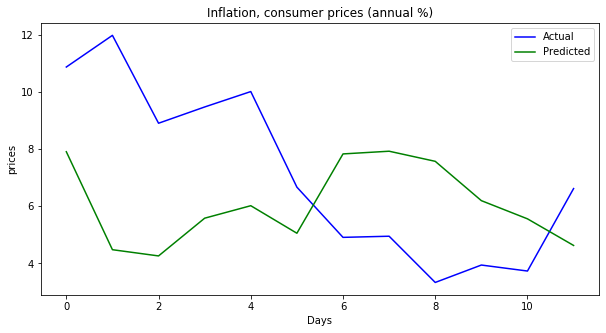

In [26]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [27]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)
forecast=model_fit.predict(len(data1), len(data1)+3)
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_oriF

RMSE-Testset: 3.747714713449254
maPe-Testset: 0.525875891409106


,"Inflation, consumer prices (annual %)"
0,5.811473
1,6.075697
2,7.245923
3,7.352502


# ARMA model

In [15]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RMSE-Testset: 0.11816088283243562
maPe-Testset: 16684642217731.576
RMSE-Testset: 0.12121164403043715
maPe-Testset: 18924911252782.633
RMSE-Testset: 0.12089937453024409
maPe-Testset: 16908320209367.658
RMSE-Testset: 0.12121164403043715
maPe-Testset: 18924911252782.633


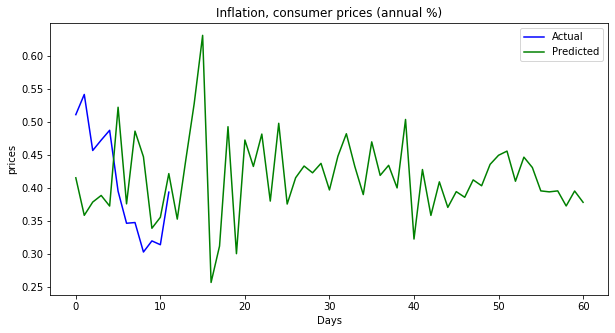

In [16]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [17]:
y_test

array([[0.51090257],
       [0.54154016],
       [0.45652774],
       [0.47226056],
       [0.48716533],
       [0.39470052],
       [0.346122  ],
       [0.34722606],
       [0.30251173],
       [0.31934861],
       [0.3135523 ],
       [0.39332045]])

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


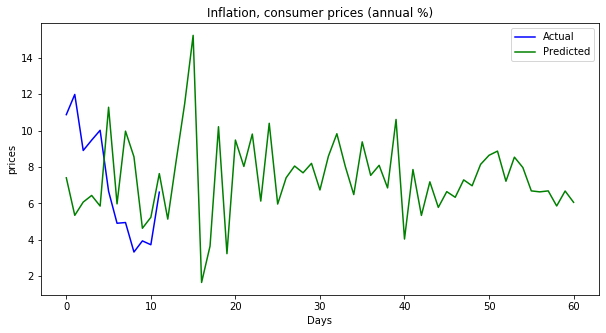

In [19]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [21]:
forecast=model_fit.predict(len(data1), len(data1)+3)
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_oriF

,"Inflation, consumer prices (annual %)"
0,7.870835
1,7.343246
2,7.417059
3,7.406732


# ARIMA model

In [28]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

RMSE-Testset: 0.13539682277264836
maPe-Testset: 29596214208439.55
RMSE-Testset: 0.12971503826199024
maPe-Testset: 18754750661656.973
RMSE-Testset: 0.19401724858048314
maPe-Testset: 20828615554119.145
RMSE-Testset: 0.15034947525251927
maPe-Testset: 29494613808864.547


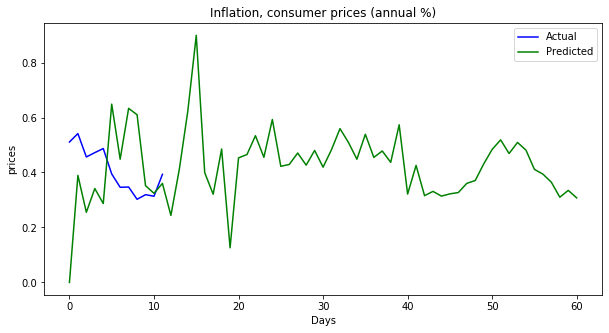

In [29]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [30]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


In [31]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[10.88],
       [11.99],
       [ 8.91],
       [ 9.48],
       [10.02],
       [ 6.67],
       [ 4.91],
       [ 4.95],
       [ 3.33],
       [ 3.94],
       [ 3.73],
       [ 6.62]])

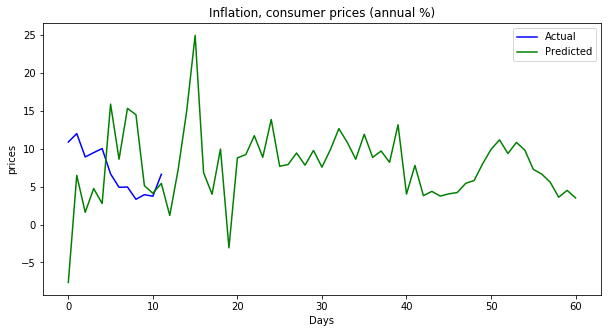

In [32]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [33]:
forecast=model_fit.predict(len(data1), len(data1)+3)
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_oriF

,"Inflation, consumer prices (annual %)"
0,6.285029
1,5.318071
2,5.817073
3,6.163584


# SARIMA model

In [34]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

RMSE-Testset: 0.4366833699589647
maPe-Testset: 0.9836065573770492
RMSE-Testset: 0.26646548997013864
maPe-Testset: 12834030071823.158


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.15379583739875008
maPe-Testset: 19826876403838.81
RMSE-Testset: 0.13539682277264836
maPe-Testset: 29596214208439.55


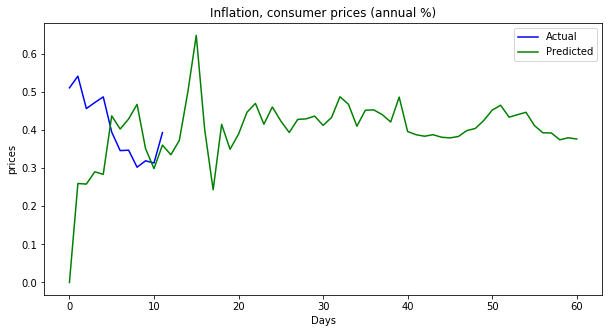

In [35]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [36]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


In [37]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[10.88],
       [11.99],
       [ 8.91],
       [ 9.48],
       [10.02],
       [ 6.67],
       [ 4.91],
       [ 4.95],
       [ 3.33],
       [ 3.94],
       [ 3.73],
       [ 6.62]])

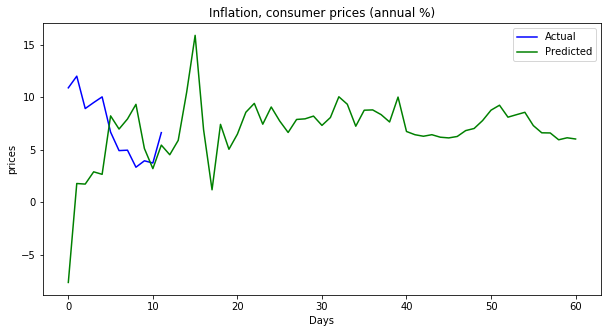

In [39]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [40]:
forecast=model_fit.predict(len(data1), len(data1)+3)
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_oriF

,"Inflation, consumer prices (annual %)"
0,7.08411
1,7.254486
2,7.317032
3,7.339992


# Hybrid model

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0) MSE=0.006


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1) MSE=0.003
ARIMA(0, 0, 2) MSE=0.004
ARIMA(0, 1, 0) MSE=0.003
ARIMA(0, 1, 1) MSE=0.006


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 2) MSE=0.003
ARIMA(0, 2, 0) MSE=0.004
ARIMA(0, 2, 1) MSE=0.003


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) MSE=0.009
ARIMA(1, 0, 0) MSE=0.004
ARIMA(1, 0, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 2) MSE=0.005
ARIMA(1, 1, 0) MSE=0.003


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 2) MSE=0.004
ARIMA(1, 2, 0) MSE=0.004
ARIMA(1, 2, 1) MSE=0.003


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2) MSE=0.005


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 0, 0) MSE=0.004
ARIMA(2, 0, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 0, 2) MSE=0.005
ARIMA(2, 1, 0) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2) MSE=0.004
ARIMA(2, 2, 0) MSE=0.003
ARIMA(2, 2, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 2, 2) MSE=0.004
Best ARIMA(0, 1, 0) MSE=0.003
1/1 [==============================] - 1s 1s/step
LSTM MSE=0.003
1/1 [==============================] - 1s 710ms/step


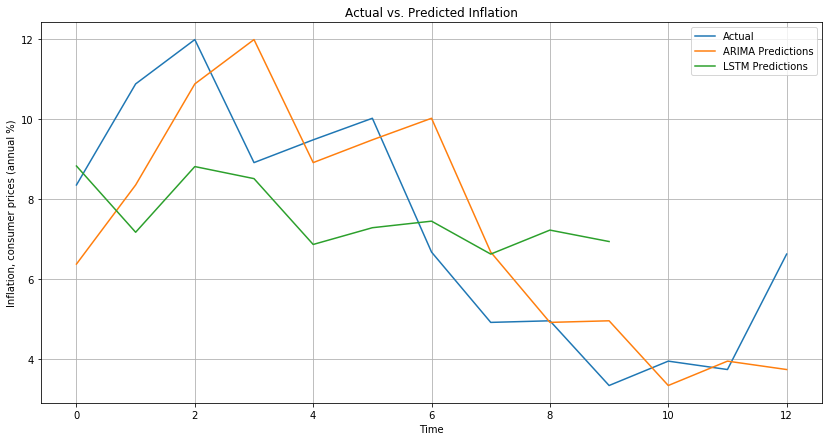

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Selecting the column for inflation
column = "Inflation, consumer prices (annual %)"
data = dataset[[column]].values.astype(float)

# Normalize data
scaler = MinMaxScaler()

# Fit the scaler on the original data
scaler.fit(data)

# Function to split the data into train and test sets
def train_test_split(data, split_fraction):
    train_size = int(len(data) * split_fraction)
    train, test = data[:train_size], data[train_size:]
    return train, test

# Function to evaluate ARIMA model
def evaluate_arima_model(data, order):
    train, test = train_test_split(data, 0.8)
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

# Function to create input-output sequences for LSTM model
def create_dataset(data, n_lag, n_seq):
    X, y = [], []
    for i in range(len(data) - n_lag - n_seq + 1):
        end_ix = i + n_lag
        out_end_ix = end_ix + n_seq
        X.append(data[i:end_ix])
        y.append(data[end_ix:out_end_ix])
    return np.array(X), np.array(y)

# Function to evaluate LSTM model
def evaluate_lstm_model(data, n_lag, n_seq, n_batch):
    train, test = train_test_split(data, 0.8)
    train_X, train_y = create_dataset(train, n_lag, n_seq)
    test_X, test_y = create_dataset(test, n_lag, n_seq)
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))
    
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(n_seq))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=100, batch_size=n_batch, verbose=0)
    
    predictions = model.predict(test_X)
    predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])
    
    # Reshape test_y to match predictions
    test_y = test_y.reshape(test_y.shape[0], test_y.shape[1])
    
    error = mean_squared_error(test_y, predictions)
    return error

# Evaluate ARIMA model
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(data_normalized, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.3f' % (order, mse))
            except:
                continue
print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# Evaluate LSTM model
n_lag = 3
n_seq = 1
n_batch = 1
lstm_mse = evaluate_lstm_model(data_normalized, n_lag, n_seq, n_batch)
print('LSTM MSE=%.3f' % lstm_mse)

# Function to make predictions using ARIMA model
def make_arima_predictions(data, order):
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return predictions

# Function to make predictions using LSTM model
def make_lstm_predictions(data, n_lag, n_seq, n_batch):
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    train_X, train_y = create_dataset(train, n_lag, n_seq)
    test_X, test_y = create_dataset(test, n_lag, n_seq)
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(n_seq))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=100, batch_size=n_batch, verbose=0)

    predictions = model.predict(test_X)
    return predictions

# Function to inverse transform predictions
def inverse_transform_predictions(predictions):
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# Make predictions using ARIMA model
arima_predictions = make_arima_predictions(data_normalized, best_cfg)

# Make predictions using LSTM model
lstm_predictions = make_lstm_predictions(data_normalized, n_lag, n_seq, n_batch)

# Inverse transform the predictions
arima_predictions = inverse_transform_predictions(arima_predictions)
lstm_predictions = inverse_transform_predictions(lstm_predictions)

# Inverse transform the test data to original scale
test_data = scaler.inverse_transform(data_normalized[int(len(data_normalized)*0.8):])

# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(test_data, label='Actual')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Inflation, consumer prices (annual %)')
plt.title('Actual vs. Predicted Inflation')
plt.legend()
plt.grid(True)
plt.show()
